## Importing Libraries

In [3]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option("display.max_colwidth", 10000)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

#!conda install -c conda-forge geocoder -y
#import geocoder # import geocoder

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    certifi-2019.6.16          |           py36_1         149 KB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.49-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

## Using Beautiful Soup to Scrape List of 50 Most Populated Cities in the US from Wikipedia

In [4]:
url = "https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population"
html = urlopen(url)
soup = bs(html,"lxml")

In [5]:
#column_headers = [th.getText().rstrip() for th in soup.findAll('tr', limit=2)[0].findAll('th')]
column_headers = ["2018 Rank", "City", "State", "2018 Estimate", "2010 Census", "Change", "2016 Land Area sq mi", "2016 Land Area sq km", "2016 Pop Den sq mi", "2016 Pop Den sq km","Location"]
column_headers

['2018 Rank',
 'City',
 'State',
 '2018 Estimate',
 '2010 Census',
 'Change',
 '2016 Land Area sq mi',
 '2016 Land Area sq km',
 '2016 Pop Den sq mi',
 '2016 Pop Den sq km',
 'Location']

In [6]:
table_rows = soup.select("tr")[1:]

In [7]:
def extract_data1(rows):
    city_data = []

    for row in rows:
        city_list = []
        city_list = [td.get_text().rstrip() for td in row.find_all("td")]
        city_data.append(city_list)    
    return(city_data)

In [8]:
test = extract_data1(table_rows)

start = test.index(['1', 'New York[d]', '\xa0New York', '8,398,748', '8,175,133', '+2.74%', '301.5\xa0sq\xa0mi', '780.9\xa0km2', '28,317/sq\xa0mi', '10,933/km2', '40°39′49″N 73°56′19″W\ufeff / \ufeff40.6635°N 73.9387°W\ufeff / 40.6635; -73.9387\ufeff (1 New York City)'])
end = test.index(['50', 'New Orleans[n]', '\xa0Louisiana', '391,006', '343,829', '+13.72%', '169.4\xa0sq\xa0mi', '438.7\xa0km2', '2,311/sq\xa0mi', '892/km2', '30°03′12″N 89°56′04″W\ufeff / \ufeff30.0534°N 89.9345°W\ufeff / 30.0534; -89.9345\ufeff (New Orleans)'])

test_new = test[start:end+1]
test_new

df = pd.DataFrame(test_new, columns=column_headers)
df.head()

,2018 Rank,City,State,2018 Estimate,2010 Census,Change,2016 Land Area sq mi,2016 Land Area sq km,2016 Pop Den sq mi,2016 Pop Den sq km,Location
0,1,New York[d],New York,"8,398,748","8,175,133",+2.74%,301.5 sq mi,780.9 km2,"28,317/sq mi","10,933/km2",40°39′49″N 73°56′19″W﻿ / ﻿40.6635°N 73.9387°W﻿ / 40.6635; -73.9387﻿ (1 New York City)
1,2,Los Angeles,California,"3,990,456","3,792,621",+5.22%,468.7 sq mi,"1,213.9 km2","8,484/sq mi","3,276/km2",34°01′10″N 118°24′39″W﻿ / ﻿34.0194°N 118.4108°W﻿ / 34.0194; -118.4108﻿ (2 Los Angeles)
2,3,Chicago,Illinois,"2,705,994","2,695,598",+0.39%,227.3 sq mi,588.7 km2,"11,900/sq mi","4,600/km2",41°50′15″N 87°40′54″W﻿ / ﻿41.8376°N 87.6818°W﻿ / 41.8376; -87.6818﻿ (3 Chicago)
3,4,Houston[3],Texas,"2,325,502","2,100,263",+10.72%,637.5 sq mi,"1,651.1 km2","3,613/sq mi","1,395/km2",29°47′12″N 95°23′27″W﻿ / ﻿29.7866°N 95.3909°W﻿ / 29.7866; -95.3909﻿ (4 Houston)
4,5,Phoenix,Arizona,"1,660,272","1,445,632",+14.85%,517.6 sq mi,"1,340.6 km2","3,120/sq mi","1,200/km2",33°34′20″N 112°05′24″W﻿ / ﻿33.5722°N 112.0901°W﻿ / 33.5722; -112.0901﻿ (6 Phoenix)


## Cleaning Data Stored in Dataframe

In [9]:
df = df[['2018 Rank', 'City', 'State', '2018 Estimate', 'Location']]
df = df.set_index('2018 Rank')

brack = "["
for n,i in enumerate(df['City']):
    if i.find(brack) == -1:
        continue
    else:
        i = i[:i.find(brack)]
        df['City'][n] = i

In [10]:
df2 = df.copy()

slash = "/"
brack = "("
semi= ";"

for n,i in enumerate(df2['Location']):
    if i.find(slash) == -1:
        continue
    else:
        i = i[i.find(slash)+1:]
        df2['Location'][n] = i

for n,i in enumerate(df2['Location']):
    if i.find(slash) == -1:
        continue
    else:
        i = i[i.find(slash)+1:]
        df2['Location'][n] = i

for n,i in enumerate(df2['Location']):
    if i.find(brack) == -1:
        continue
    else:
        i = i[:i.find(brack)]
        df2['Location'][n] = i

      
df2.head()

,City,State,2018 Estimate,Location
2018 Rank,,,,
1,New York,New York,"8,398,748",40.6635; -73.9387﻿
2,Los Angeles,California,"3,990,456",34.0194; -118.4108﻿
3,Chicago,Illinois,"2,705,994",41.8376; -87.6818﻿
4,Houston,Texas,"2,325,502",29.7866; -95.3909﻿
5,Phoenix,Arizona,"1,660,272",33.5722; -112.0901﻿


In [11]:
df2["Latitude"] = ""
df2["Longitude"] = ""

In [12]:
ufeff = "\ufeff"

for n,i in enumerate(df2['Location']):
    if i.find(semi) == -1:
        continue
    else:
        lat = i[:i.find(semi)]
        lon = i[i.find(semi)+2:]
        df2['Longitude'][n] = lon
        df2['Latitude'][n] = lat
df2 = df2.drop(columns = ['Location'])

for n,i in enumerate(df2['Longitude']):
    if i.find(ufeff) == -1:
        continue
    else:
        lon = i[:i.find(ufeff)]
        df2['Longitude'][n] = lon
        
df = df2.copy()

df.head()

,City,State,2018 Estimate,Latitude,Longitude
2018 Rank,,,,,
1,New York,New York,"8,398,748",40.6635,-73.9387
2,Los Angeles,California,"3,990,456",34.0194,-118.4108
3,Chicago,Illinois,"2,705,994",41.8376,-87.6818
4,Houston,Texas,"2,325,502",29.7866,-95.3909
5,Phoenix,Arizona,"1,660,272",33.5722,-112.0901


In [13]:
df['Latitude'] = df['Latitude'].astype(float)
df['Longitude'] = df['Longitude'].astype(float)
df.head()

,City,State,2018 Estimate,Latitude,Longitude
2018 Rank,,,,,
1,New York,New York,"8,398,748",40.6635,-73.9387
2,Los Angeles,California,"3,990,456",34.0194,-118.4108
3,Chicago,Illinois,"2,705,994",41.8376,-87.6818
4,Houston,Texas,"2,325,502",29.7866,-95.3909
5,Phoenix,Arizona,"1,660,272",33.5722,-112.0901


## Use Folium and our Cleaned Data to Show the US map of the 50 Most Populated Cities

In [14]:
# create map of US

address = 'United States of America'

geolocator = Nominatim(user_agent="us_explorer")
location = geolocator.geocode(address)
latUS = location.latitude
lonUS = location.longitude

map_us = folium.Map(location=[latUS, lonUS], zoom_start=5)

# add markers to map
for lat, lng, city, state in zip(df['Latitude'], df['Longitude'], df['City'], df['State']):
    label = '{}, {}'.format(city, state)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_us)  
    
map_us

## Use Foursquare API to Find Top Venue Picks for Each City, and Trending Venues in Each City on a Sunday afternoon in the Summer

In [15]:
CLIENT_ID = 'AWEK3UQGWUOIKQI2RFLAPE3MHTNSXCDJPPEYJEB3SK5JALDJ' # your Foursquare ID
CLIENT_SECRET = 'KZFNGY33XFRWJZ3DKYGRA2D5ECRP12N0Y1NUMMALVCPRDWFN' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

LIMIT = 1000 # limit of number of venues returned by Foursquare API
rad = 50000 # define radius in meters

In [16]:
def getNearbyVenues(names, latitudes, longitudes, sect):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&section={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            rad, 
            LIMIT,
            sect)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [17]:
# Get Top Picks for Venues in Each City
us_venues_top = getNearbyVenues(names=df['City'],latitudes=df['Latitude'],longitudes=df['Longitude'], sect = "topPicks")
us_venues_top.head()

New York
Los Angeles
Chicago
Houston
Phoenix
Philadelphia
San Antonio
San Diego
Dallas
San Jose
Austin
Jacksonville
Fort Worth
Columbus
San Francisco
Charlotte
Indianapolis
Seattle
Denver
Washington
Boston
El Paso
Detroit
Nashville
Portland
Memphis
Oklahoma City
Las Vegas
Louisville
Baltimore
Milwaukee
Albuquerque
Tucson
Fresno
Mesa
Sacramento
Atlanta
Kansas City
Colorado Springs
Miami
Raleigh
Omaha
Long Beach
Virginia Beach
Oakland
Minneapolis
Tulsa
Arlington
Tampa
New Orleans


,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,New York,40.6635,-73.9387,Mekelburg's,40.687571,-73.962370,Gourmet Shop
1,New York,40.6635,-73.9387,Brooklyn Bridge Park - Pier 5,40.694918,-74.001686,Pier
2,New York,40.6635,-73.9387,Los Mariscos,40.742000,-74.005890,Seafood Restaurant
3,New York,40.6635,-73.9387,Gotham Archery,40.682504,-73.986032,Athletics & Sports
4,New York,40.6635,-73.9387,Los Tacos No. 1,40.757134,-73.987536,Taco Place


In [18]:
# Get Trending Venues in Each City on a Sunday Afternoon in the Summer
us_venues_trend = getNearbyVenues(names=df['City'],latitudes=df['Latitude'],longitudes=df['Longitude'], sect = "trending")
us_venues_trend.head()

New York
Los Angeles
Chicago
Houston
Phoenix
Philadelphia
San Antonio
San Diego
Dallas
San Jose
Austin
Jacksonville
Fort Worth
Columbus
San Francisco
Charlotte
Indianapolis
Seattle
Denver
Washington
Boston
El Paso
Detroit
Nashville
Portland
Memphis
Oklahoma City
Las Vegas
Louisville
Baltimore
Milwaukee
Albuquerque
Tucson
Fresno
Mesa
Sacramento
Atlanta
Kansas City
Colorado Springs
Miami
Raleigh
Omaha
Long Beach
Virginia Beach
Oakland
Minneapolis
Tulsa
Arlington
Tampa
New Orleans


,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,New York,40.6635,-73.9387,Trader Joe's,40.725611,-74.004985,Grocery Store
1,New York,40.6635,-73.9387,Prospect Park (Nethermead),40.660717,-73.968587,Field
2,New York,40.6635,-73.9387,City Swiggers,40.777515,-73.950820,Beer Store
3,New York,40.6635,-73.9387,Gotham Archery,40.682504,-73.986032,Athletics & Sports
4,New York,40.6635,-73.9387,SoulCycle Brooklyn Heights,40.692253,-73.991042,Cycle Studio


## Find the Most Frequently Appearing Venue Categories (for Top Picks and for Trending Venues) in each City

In [19]:
# one hot encoding
us_onehot_top = pd.get_dummies(us_venues_top[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
us_onehot_top['City'] = us_venues_top['City'] 

# move neighborhood column to the first column
fixed_columns = [us_onehot_top.columns[-1]] + list(us_onehot_top.columns[:-1])
us_onehot_top = us_onehot_top[fixed_columns]

us_grouped_top = us_onehot_top.groupby('City').mean().reset_index()
us_grouped_top.head()

,City,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Amphitheater,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Field,Bavarian Restaurant,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Bistro,Board Shop,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Café,Cajun / Creole Restaurant,Campground,Canal,Canal Lock,Candy Store,Caribbean Restaurant,Castle,Cave,Cheese Shop,Chinese Restaurant,Chocolate Shop,Churrascaria,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Dive Bar,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,English Restaurant,Ethiopian Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish Market,Flower Shop,Food Court,Food Truck,Forest,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gastropub,Gay Bar,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gun Shop,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Herbs & Spices Store,Hill,History Museum,Hobby Shop,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hunting Supply,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Korean Restaurant,Lake,Latin American Restaurant,Lighthouse,Liquor Store,Lounge,Malay Restaurant,Marijuana Dispensary,Market,Massage Studio,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Meze Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Moroccan Restaurant,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music Store,Music Venue,National Park,Nature Preserve,New American Restaurant,Nightclub,Noodle House,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pie Shop,Pier,Piercing Parlor,Pizza Place,Planetarium,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Pub,Public Art,Rafting,Ramen Restaurant,Record Shop,Recreation Center,Reservoir,Resort,Restaurant,River,Rock Climbing Spot,Rock Club,Romanian Restaurant,Salad Place,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Ski Lodge,Smoke Shop,Snack Place,Soccer Field,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,State / Provincial Park,Steakhouse,Street Food Gathering,Supermarket,Surf Spot,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Tapas Restaurant,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theater,Tiki Bar,Tour Provider,Toy / Game Store,Track,Trail,Train Station,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Vineyard,Warehouse Store,Waterfall,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Yoga Studio,Zoo Exhibit
0,Albuquerque,0.0,0.0,0.0,0.0,0.01,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.03,0.0,0.02,0.00,0.0,0.0,0.01,0.0,0.01,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.02,0.00,0.0,0.00,0.01,0.14,0.0,0.0,0.0,0.02,0.0,0.03,0.0,0.00,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.02,0.0,0.0,0.00,0.00,0.0,0.00,0.01,0.00,0.0,0.0,0.00,0.00,0.02,0.01,0.00,0.0,0.0,0.0,0.0,0.

In [20]:
# one hot encoding
us_onehot_trend = pd.get_dummies(us_venues_trend[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
us_onehot_trend['City'] = us_venues_trend['City'] 

# move neighborhood column to the first column
fixed_columns = [us_onehot_trend.columns[-1]] + list(us_onehot_trend.columns[:-1])
us_onehot_trend = us_onehot_trend[fixed_columns]

us_grouped_trend = us_onehot_trend.groupby('City').mean().reset_index()
us_grouped_trend.head()

,City,Accessories Store,African Restaurant,American Restaurant,Amphitheater,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Bavarian Restaurant,Beach,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buddhist Temple,Building,Burger Joint,Burrito Place,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Campground,Canal,Candy Store,Capitol Building,Caribbean Restaurant,Casino,Cemetery,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Baseball Diamond,College Basketball Court,College Bookstore,College Residence Hall,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,English Restaurant,Ethiopian Restaurant,Event Space,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish Market,Flower Shop,Fondue Restaurant,Food Court,Food Truck,Football Stadium,Forest,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gun Shop,Gym,Gym / Fitness Center,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Hill,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hunting Supply,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Island,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Leather Goods Store,Library,Lighthouse,Lingerie Store,Liquor Store,Lounge,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Meze Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Monument / Landmark,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,National Park,Nature Preserve,Neighborhood,New American Restaurant,Nightclub,Noodle House,Observatory,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Outdoor Event Space,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Park,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pie Shop,Pier,Piercing Parlor,Pilates Studio,Pizza Place,Planetarium,Playground,Plaza,Poke Place,Pool,Pub,Racetrack,Radio Station,Ramen Restaurant,Record Shop,Recreation Center,Reservoir,Residential Building (Apartment / Condo),Resort,Restaurant,River,Rock Climbing Spot,Rock Club,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Ski Trail,Smoke Shop,Smoothie Shop,Snack Place,Soccer Stadium,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stables,Stadium,State / Provincial Park,Steakhouse,Street Food Gathering,Summer Camp,Supermarket,

In [21]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [22]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
us_venues_top_sorted = pd.DataFrame(columns=columns)
us_venues_top_sorted['City'] = us_grouped_top['City']

for ind in np.arange(us_grouped_top.shape[0]):
    us_venues_top_sorted.iloc[ind, 1:] = return_most_common_venues(us_grouped_top.iloc[ind, :], num_top_venues)

us_venues_top_sorted.head()

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Albuquerque,Brewery,Pizza Place,Mexican Restaurant,Movie Theater,Science Museum
1,Arlington,Brewery,Coffee Shop,American Restaurant,Seafood Restaurant,Trail
2,Atlanta,Trail,Park,Sandwich Place,American Restaurant,Coffee Shop
3,Austin,Coffee Shop,Taco Place,Ice Cream Shop,Movie Theater,Pizza Place
4,Baltimore,Seafood Restaurant,Park,BBQ Joint,Ice Cream Shop,Pizza Place


In [23]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
us_venues_trend_sorted = pd.DataFrame(columns=columns)
us_venues_trend_sorted['City'] = us_grouped_trend['City']

for ind in np.arange(us_grouped_trend.shape[0]):
    us_venues_trend_sorted.iloc[ind, 1:] = return_most_common_venues(us_grouped_trend.iloc[ind, :], num_top_venues)

us_venues_trend_sorted.head()

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Albuquerque,Pizza Place,American Restaurant,Coffee Shop,Brewery,Grocery Store
1,Arlington,Grocery Store,Brewery,American Restaurant,Fast Food Restaurant,Park
2,Atlanta,Trail,American Restaurant,Park,Brewery,Grocery Store
3,Austin,Pizza Place,Coffee Shop,Taco Place,Ice Cream Shop,Sandwich Place
4,Baltimore,BBQ Joint,Park,Fast Food Restaurant,Coffee Shop,Gym


## K Means Clustering of Cities based on the Most Commonly Occuring Categories of Top Picked Venues

In [24]:
# set number of clusters
kclusters = 5

us_grouped_top_clustering = us_grouped_top.drop('City', 1).reset_index()

# run k-means clustering
kmeans_top = KMeans(n_clusters=kclusters, random_state=0).fit(us_grouped_top_clustering)

# check cluster labels generated for each row in the dataframe
kmeans_top.labels_[0:10] 

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [25]:
# add clustering labels
us_venues_top_sorted['Cluster Labels'] = kmeans_top.labels_

us_top_merged = df.copy()

us_top_merged = us_top_merged.join(us_venues_top_sorted.set_index('City'), on='City')
us_top_merged.head()

,City,State,2018 Estimate,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Cluster Labels
2018 Rank,,,,,,,,,,,
1,New York,New York,"8,398,748",40.6635,-73.9387,Park,Theater,Ice Cream Shop,Bookstore,Pizza Place,2
2,Los Angeles,California,"3,990,456",34.0194,-118.4108,Park,Ice Cream Shop,Art Museum,Trail,Beach,4
3,Chicago,Illinois,"2,705,994",41.8376,-87.6818,Park,Ice Cream Shop,Brewery,Trail,Coffee Shop,3
4,Houston,Texas,"2,325,502",29.7866,-95.3909,Park,Trail,Beer Garden,Shopping Mall,Mexican Restaurant,1
5,Phoenix,Arizona,"1,660,272",33.5722,-112.0901,Pizza Place,Brewery,Ice Cream Shop,Park,Theater,2


In [26]:
# create map
map_clusters = folium.Map(location=[latUS, lonUS], zoom_start=5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)+1))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(us_top_merged['Latitude'], us_top_merged['Longitude'], us_top_merged['City'], us_top_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)

map_clusters

In [27]:
top_grouped = us_top_merged.groupby(['Cluster Labels'])['City'].apply(','.join).reset_index()
top_grouped.head()

,Cluster Labels,City
0,0,"San Antonio,San Diego,San Jose,San Francisco,Seattle,Washington,Tucson,Virginia Beach,Tulsa,Tampa"
1,1,"Houston,Jacksonville,Fort Worth,Indianapolis,Denver,El Paso,Detroit,Fresno,Kansas City"
2,2,"New York,Phoenix,Philadelphia,Portland,Oklahoma City,Sacramento,Raleigh,Omaha,Oakland,New Orleans"
3,3,"Chicago,Dallas,Austin,Columbus,Charlotte,Boston,Baltimore,Albuquerque,Atlanta,Colorado Springs,Arlington"
4,4,"Los Angeles,Nashville,Memphis,Las Vegas,Louisville,Milwaukee,Mesa,Miami,Long Beach,Minneapolis"


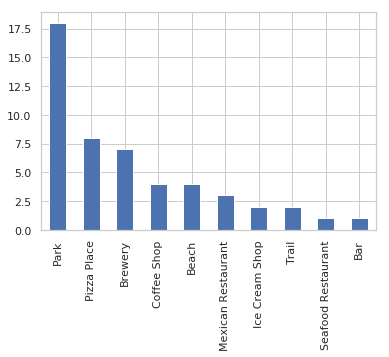

In [37]:
fig, ax = plt.subplots()
us_top_merged['1st Most Common Venue'].value_counts().plot(ax=ax, kind='bar')

## K Means Clustering of Cities based on the Most Commonly Occuring Categories of Venues Trending on a Summer Sunday Afternoon

In [28]:
# set number of clusters
kclusters = 5

us_grouped_trend_clustering = us_grouped_trend.drop('City', 1).reset_index()

# run k-means clustering
kmeans_trend = KMeans(n_clusters=kclusters, random_state=0).fit(us_grouped_trend_clustering)

# check cluster labels generated for each row in the dataframe
kmeans_trend.labels_[0:10] 

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [29]:
# add clustering labels
us_venues_trend_sorted['Cluster Labels'] = kmeans_trend.labels_

us_trend_merged = df.copy()

us_trend_merged = us_trend_merged.join(us_venues_trend_sorted.set_index('City'), on='City')
us_trend_merged.head()

,City,State,2018 Estimate,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Cluster Labels
2018 Rank,,,,,,,,,,,
1,New York,New York,"8,398,748",40.6635,-73.9387,Park,Theater,Pizza Place,Gym,Ice Cream Shop,2
2,Los Angeles,California,"3,990,456",34.0194,-118.4108,Theme Park Ride / Attraction,Park,Sandwich Place,Burger Joint,Trail,4
3,Chicago,Illinois,"2,705,994",41.8376,-87.6818,Ice Cream Shop,Grocery Store,Coffee Shop,Theater,Italian Restaurant,3
4,Houston,Texas,"2,325,502",29.7866,-95.3909,Grocery Store,Park,American Restaurant,Trail,Brewery,1
5,Phoenix,Arizona,"1,660,272",33.5722,-112.0901,Pizza Place,Burger Joint,Park,Grocery Store,Coffee Shop,2


In [30]:
# create map
map_clusters = folium.Map(location=[latUS, lonUS], zoom_start=5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)+1))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(us_trend_merged['Latitude'], us_trend_merged['Longitude'], us_trend_merged['City'], us_trend_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)

map_clusters

In [31]:
trend_grouped = us_trend_merged.groupby(['Cluster Labels'])['City'].apply(','.join).reset_index()
trend_grouped.head()

,Cluster Labels,City
0,0,"San Antonio,San Diego,San Jose,San Francisco,Seattle,Washington,Tucson,Virginia Beach,Tulsa,Tampa"
1,1,"Houston,Jacksonville,Fort Worth,Indianapolis,Denver,El Paso,Detroit,Fresno,Kansas City"
2,2,"New York,Phoenix,Philadelphia,Portland,Oklahoma City,Sacramento,Raleigh,Omaha,Oakland,New Orleans"
3,3,"Chicago,Dallas,Austin,Columbus,Charlotte,Boston,Baltimore,Albuquerque,Atlanta,Colorado Springs,Arlington"
4,4,"Los Angeles,Nashville,Memphis,Las Vegas,Louisville,Milwaukee,Mesa,Miami,Long Beach,Minneapolis"


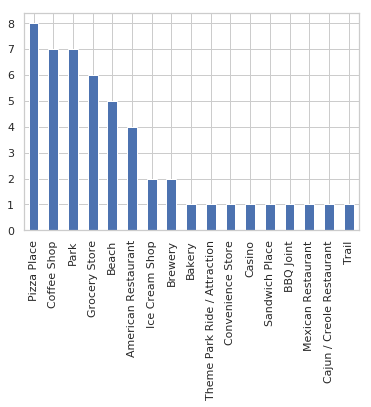

In [38]:
fig, ax = plt.subplots()
us_trend_merged['1st Most Common Venue'].value_counts().plot(ax=ax, kind='bar')